In [23]:
# import from skimage
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v, prewitt, roberts, gaussian
from skimage.feature import canny
import skimage.io as io
import cv2 as cv
# import from matplotlib
import matplotlib.pyplot as plt

# import from numpy
import numpy as np

# import utils
from utils.commonfunctions import *


In [61]:
# img = io.imread("datasets/dataset_module1/01.jpg")
img = cv.imread('datasets/dataset_module1/01.jpg',0)
grey_scale = rgb2gray(img)

<ipython-input-61-33ed24b58db8>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  grey_scale = rgb2gray(img)


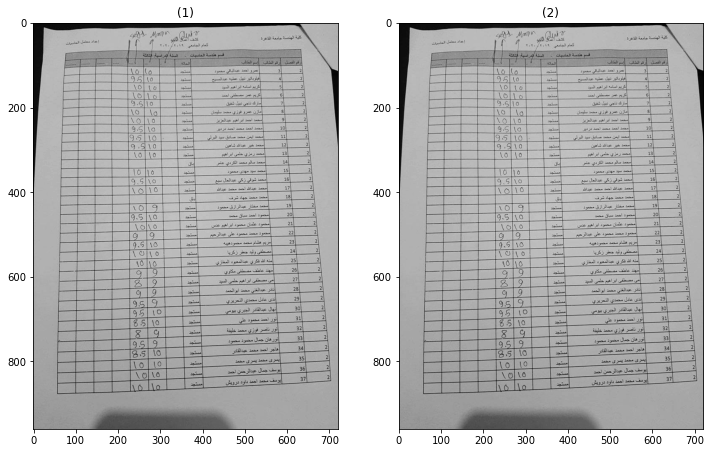

In [62]:
show_images(images=[img,grey_scale])

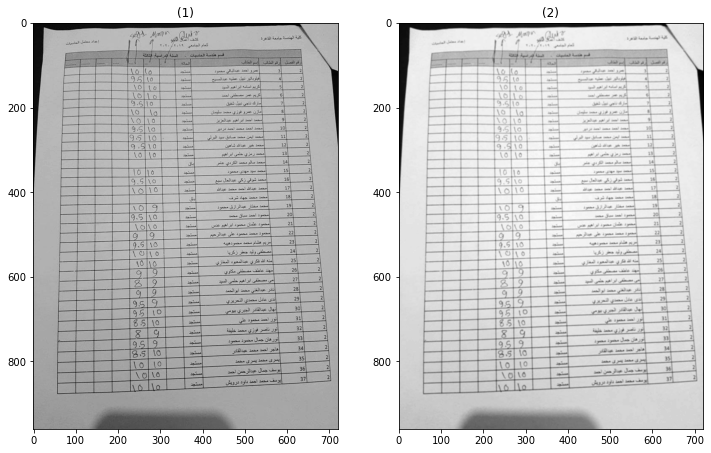

In [71]:
def gaussianFilter(img):
#     newImg = gaussian(img, sigma=1,mode='nearest', cval=0, preserve_range=False, truncate=4.0)
    newImg = cv.GaussianBlur(img,(5,5),0)
    return newImg
show_images([grey_scale,gaussianFilter(grey_scale)])

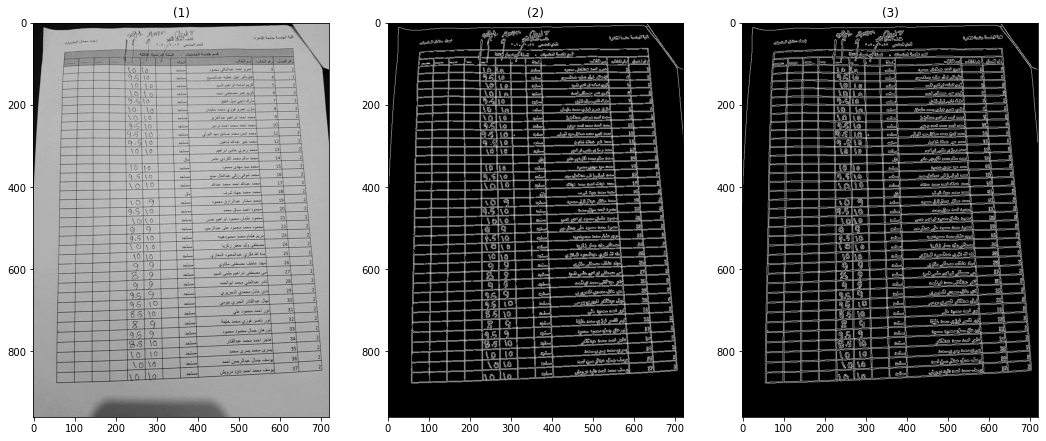

In [76]:
def cannyEdge(img,sigma=1,thres1=100,thres2=200):
#     edges = abs(canny(img,sigma = sigma))
#     img = (img*255).astype(np.uint8)
    edges = cv.Canny(img,thres1,thres2,L2gradient = True)
    return edges
cannyEdges = cannyEdge(grey_scale)
show_images([grey_scale,cannyEdges,canny(grey_scale,sigma = 1)])

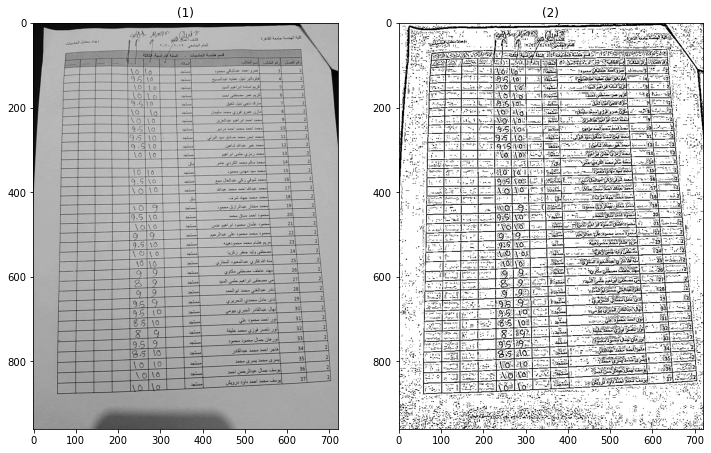

array([[255, 255, 255, ..., 255,   0, 255],
       [255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255,   0]], dtype=uint8)

In [73]:
def adaptiveThresholding(img):
#     img = (img*255).astype(np.uint8)
    filteredImg = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
    show_images([img,filteredImg])
    return filteredImg
adaptiveThresholding(grey_scale)

In [82]:
def closing (img,kernel):
    closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    return closing

In [88]:
def opening (img,kernel):
    closing = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    return closing

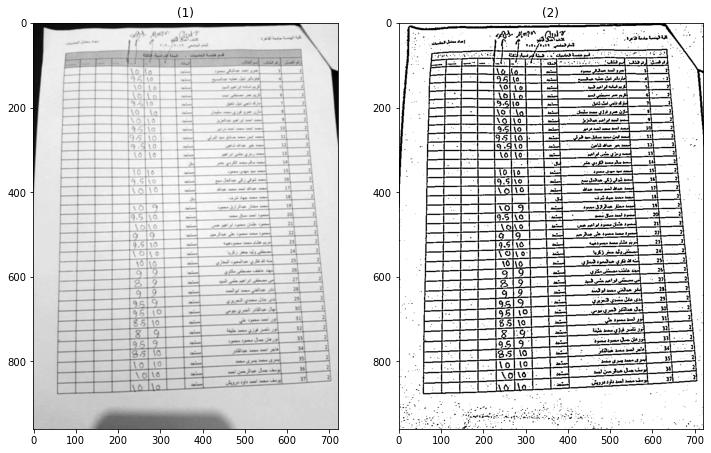

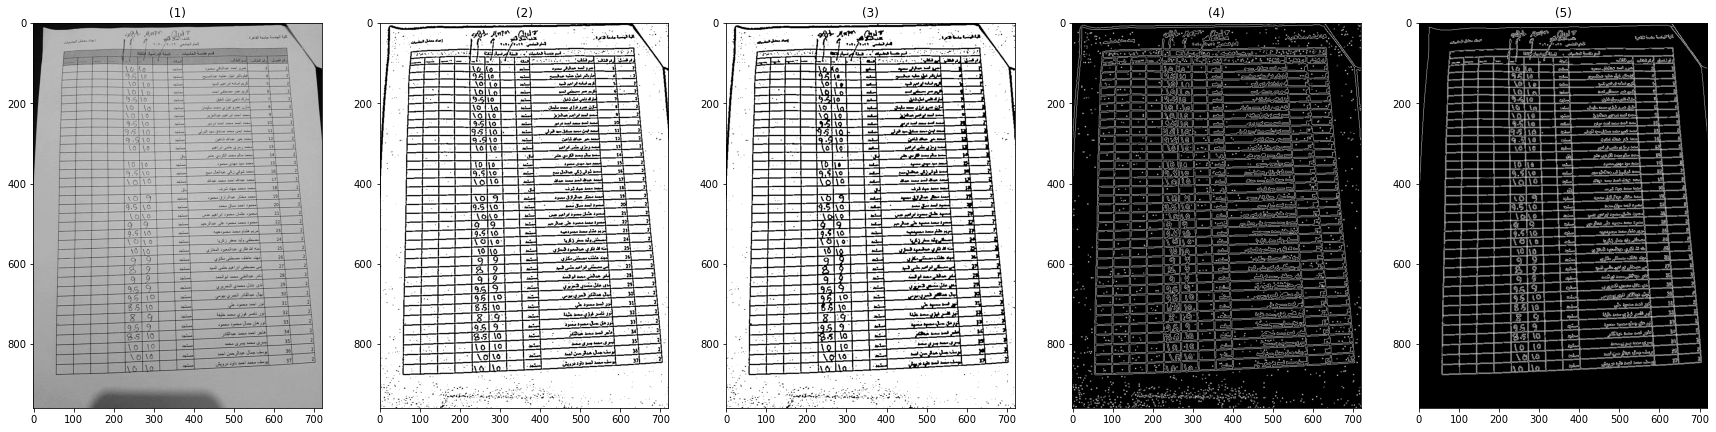

In [89]:
denoised = gaussianFilter(grey_scale)
filteredImg = adaptiveThresholding(denoised)
kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
])
dilatedImg = opening(filteredImg,kernel)

edges = cannyEdge(dilatedImg)
show_images([grey_scale,filteredImg,dilatedImg,edges,cannyEdges])